A notebook to demonstrate the use of the analysis functions for lda dictionaries

In [1]:
original_dict_file = '/Users/simon/Dropbox/BioResearch/Meta_clustering/KRD/mzml sylvia/molnet130918/carnegie_lda.dict'

Load the dictionary

In [2]:
import pickle
with open(original_dict_file,'r') as f:
    lda_dict = pickle.loads(f.read())

In [3]:
print lda_dict.keys()

['phi', 'features', 'doc_metadata', 'alpha', 'K', 'word_index', 'topic_index', 'beta', 'topic_metadata', 'theta', 'corpus', 'overlap_scores', 'doc_index', 'gamma']


User can set some parameters here

In [4]:
overlap_thresh = 0.3
probability_thresh = 0.1

Compute motif degrees

In [5]:
%load_ext autoreload
%autoreload 2
from lda_analysis_functions import compute_motif_degrees
motif_degree_dict,motif_degree_list = compute_motif_degrees(lda_dict,probability_thresh,overlap_thresh)

print the top 10 motifs by degree

In [6]:
for m,d in motif_degree_list[:10]:
    print m,d

motif_283 1132
motif_200 411
motif_297 118
motif_71 97
motif_144 89
motif_205 89
motif_241 83
motif_87 79
motif_233 76
motif_236 73


Print the degree of any motif

In [7]:
motif = 'motif_236'
print motif_degree_dict[motif]

73


Plot a motif

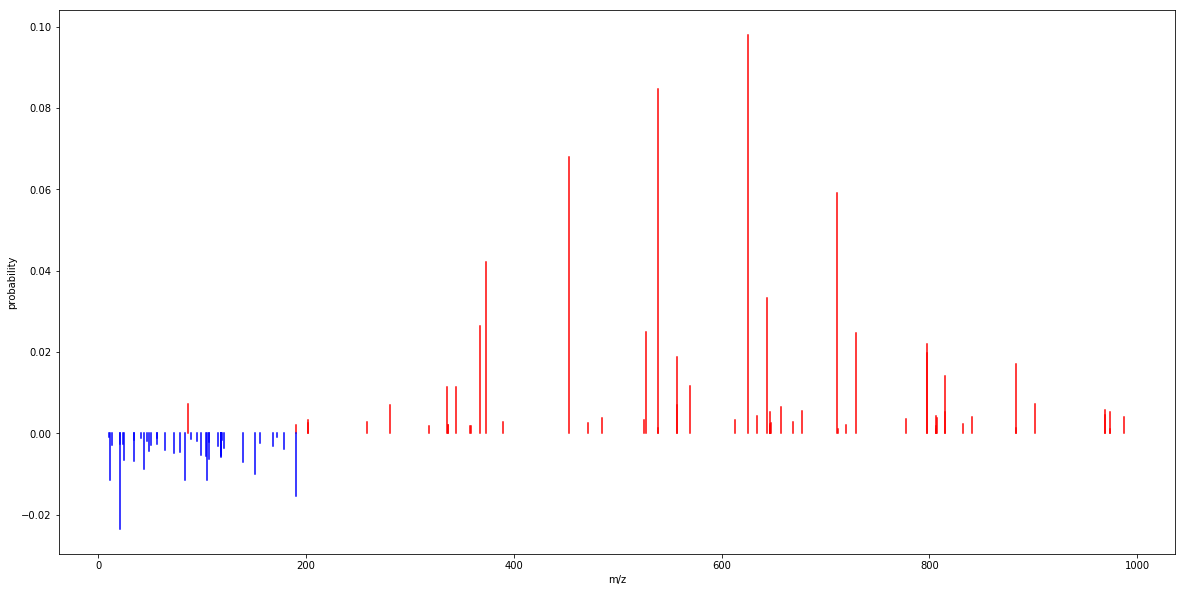

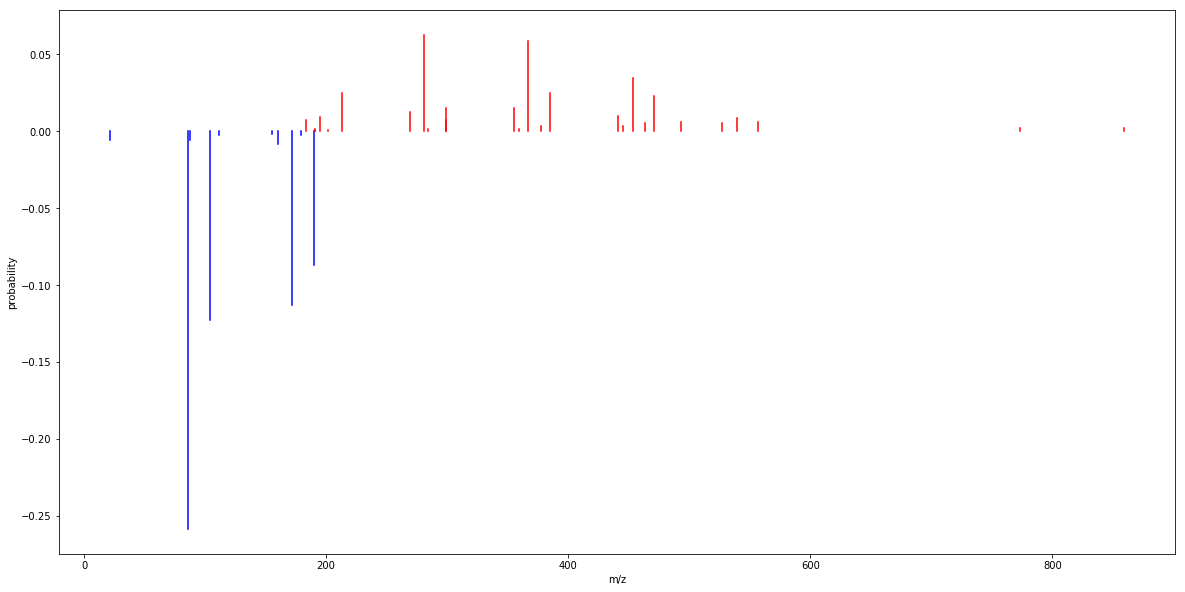

In [18]:
from lda_analysis_functions import plot_motif
import pylab as plt
%matplotlib inline
# plot_motif(lda_dict,'motif_22')
plot_motif(lda_dict,'motif_106',figsize=(20,10))
plot_motif(lda_dict,'motif_125',figsize=(20,10))

List the available document metadata fields

In [9]:
from lda_analysis_functions import list_metadata_fields
mdf = list_metadata_fields(lda_dict)
print mdf

['name', 'cid', 'precursormass', 'parentrt', 'filename', 'charge', 'parentintensity', 'familyid', 'singlechargeprecursormass', 'parentmass', 'scanno']


In [10]:
from lda_analysis_functions import print_mols
print_mols(lda_dict,['1'])

Spectra name        	precursormass       	parentrt            	
1                   	679.510192871       	41.2024             	


Print all molecules in a particular motif

In [11]:
motif = 'motif_40'
from lda_analysis_functions import get_motif_mols
mols = get_motif_mols(lda_dict,motif,probability_thresh,overlap_thresh)
print_mols(lda_dict,
           mols,
           fields = ['precursormass','parentrt','scanno'])

Spectra name        	precursormass       	parentrt            	scanno              	
5499                	890.594482422       	1082.4358           	1802                	
5741                	809.169128418       	689.9597            	1163                	
5301                	921.750915527       	1760.4542           	2934                	
6021                	950.711425781       	1675.0987           	2811                	


Plot a document

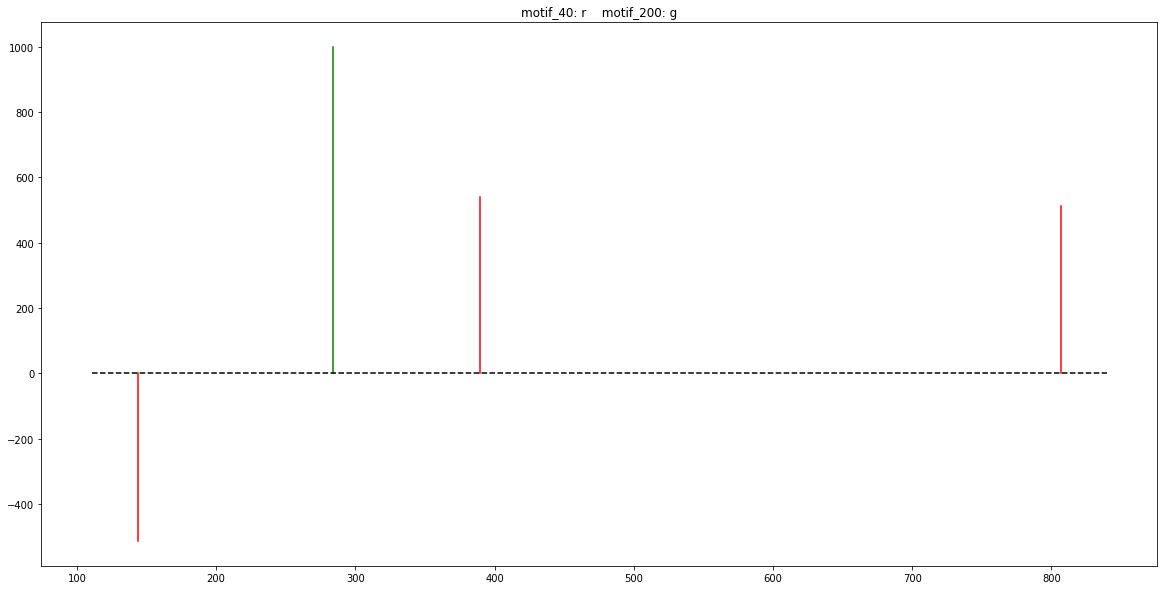

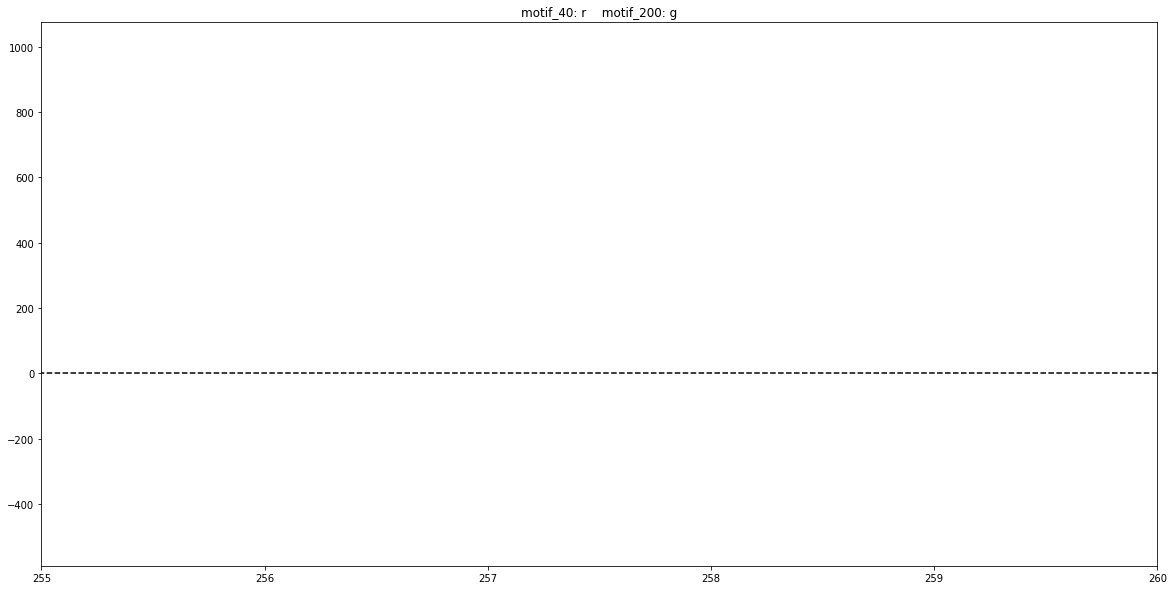

In [17]:
mol = mols[3]
from lda_analysis_functions import plot_mol
plot_mol(lda_dict,mol,color_motifs = True,figsize=(20,10))
# The optional xlim parameter allows us to zoom in
plot_mol(lda_dict,mol,color_motifs = True,xlim = [255,260],figsize=(20,10))

Now for some motif matching

Firstly, load motifdb

In [20]:
motifdb_path = '/Users/simon/git/motifdb/'
import sys,os
sys.path.append(os.path.join(motifdb_path,'code','utilities'))
from motifdb_loader import load_db,MotifFilter
dbs_to_load = ['massbank_binned_005','gnps_binned_005']
db_spectra,db_metadata = load_db(dbs_to_load,motifdb_path+'motifs')
mf = MotifFilter(db_spectra,db_metadata)
db_spectra,db_metadata = mf.filter()

Looking in /Users/simon/git/motifdb/motifs/massbank_binned_005/*.m2m
	 Found 46
Looking in /Users/simon/git/motifdb/motifs/gnps_binned_005/*.m2m
	 Found 78
Found total of 124 motif files
Merging: gnps_motif_11.m2m and mb_motif_13.m2m (1.0)
Merging: gnps_motif_12.m2m and mb_motif_5.m2m (1.0)
Merging: gnps_motif_13.m2m and mb_motif_6.m2m (1.0)
Merging: gnps_motif_14.m2m and mb_motif_7.m2m (0.996808602927)
Merging: gnps_motif_15.m2m and mb_motif_8.m2m (1.0)
Merging: gnps_motif_21.m2m and mb_motif_19.m2m (1.0)
Merging: gnps_motif_3.m2m and mb_motif_0.m2m (1.0)
Merging: gnps_motif_35.m2m and mb_motif_17.m2m (1.0)
Merging: gnps_motif_37.m2m and mb_motif_20.m2m (1.0)
Merging: gnps_motif_38.m2m and gnps_motif_5.m2m (1.0)
Merging: gnps_motif_38.m2m and mb_motif_15.m2m (1.0)
Merging: gnps_motif_38.m2m and mb_motif_2.m2m (1.0)
Merging: gnps_motif_4.m2m and mb_motif_1.m2m (1.0)
Merging: gnps_motif_40.m2m and mb_motif_18.m2m (1.0)
Merging: gnps_motif_42.m2m and mb_motif_21.m2m (1.0)
Merging: gnps_m

In [21]:
from lda_analysis_functions import match_motifs
matches = match_motifs(lda_dict,db_spectra,threshold = 0.00)


[('motif_236', 'gnps_motif_38.m2m', 0.9954817220152722), ('motif_275', 'gnps_motif_49.m2m', 0.9881828932110942), ('motif_199', 'gnps_motif_43.m2m', 0.9867120681264077), ('motif_297', 'gnps_motif_56.m2m', 0.9861297352620982), ('motif_100', 'gnps_motif_40.m2m', 0.9846452357709403), ('motif_90', 'gnps_motif_64.m2m', 0.963010505131), ('motif_68', 'gnps_motif_66.m2m', 0.8651494286080019), ('motif_13', 'mb_motif_150.m2m', 0.8586932489391943), ('motif_47', 'gnps_motif_25.m2m', 0.8464086079729355), ('motif_13', 'gnps_motif_18.m2m', 0.8185075433271813), ('motif_266', 'gnps_motif_59.m2m', 0.7966702245713699), ('motif_241', 'gnps_motif_17.m2m', 0.7905736729963851), ('motif_267', 'mb_motif_10.m2m', 0.7864712630418489), ('motif_181', 'gnps_motif_72.m2m', 0.7527504266905954), ('motif_267', 'gnps_motif_9.m2m', 0.6392141951253745), ('motif_278', 'gnps_motif_0.m2m', 0.5518692939130425), ('motif_60', 'gnps_motif_42.m2m', 0.47578478766206517), ('motif_287', 'gnps_motif_21.m2m', 0.46579767109864256), ('mo

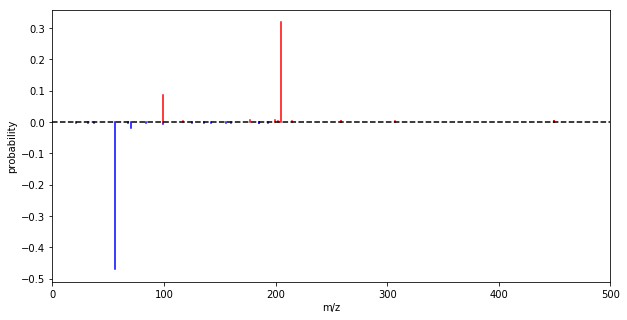

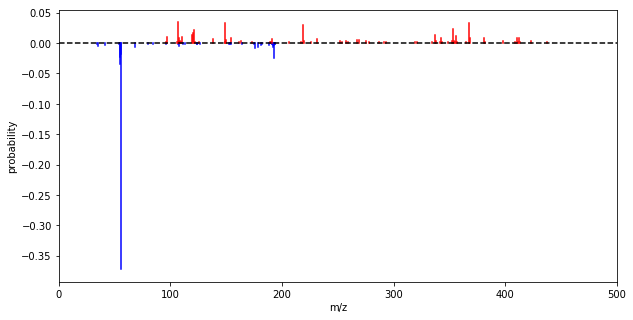

In [39]:
match_idx = 11
plot_motif(lda_dict,matches[match_idx][0],xlim=[0,500],figsize=(10,5))
from lda_analysis_functions import plot_motif_from_dict
plot_motif_from_dict(db_spectra[matches[match_idx][1]],xlim=[0,500],figsize=(10,5))